In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 
  
# reading features list 
with open(r"C:\Users\Giridhar K R\Desktop\final year project related\Intrusion-Detection-System-master\dataset\kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()): 
       columns.append(c.strip()) 
  
columns.append('target') 
print(len(columns)) 

42


In [3]:
with open(r"C:\Users\Giridhar K R\Desktop\final year project related\Intrusion-Detection-System-master\dataset\training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = { 
    'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
}

In [5]:
path = r"C:\Users\Giridhar K R\Desktop\final year project related\Intrusion-Detection-System-master\dataset\kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns) 
  
# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
df.shape 


(494021, 43)

In [7]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
# Finding categorical features 
num_cols = df._get_numeric_data().columns 
  
cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 
  
cate_cols

['protocol_type', 'service', 'flag']

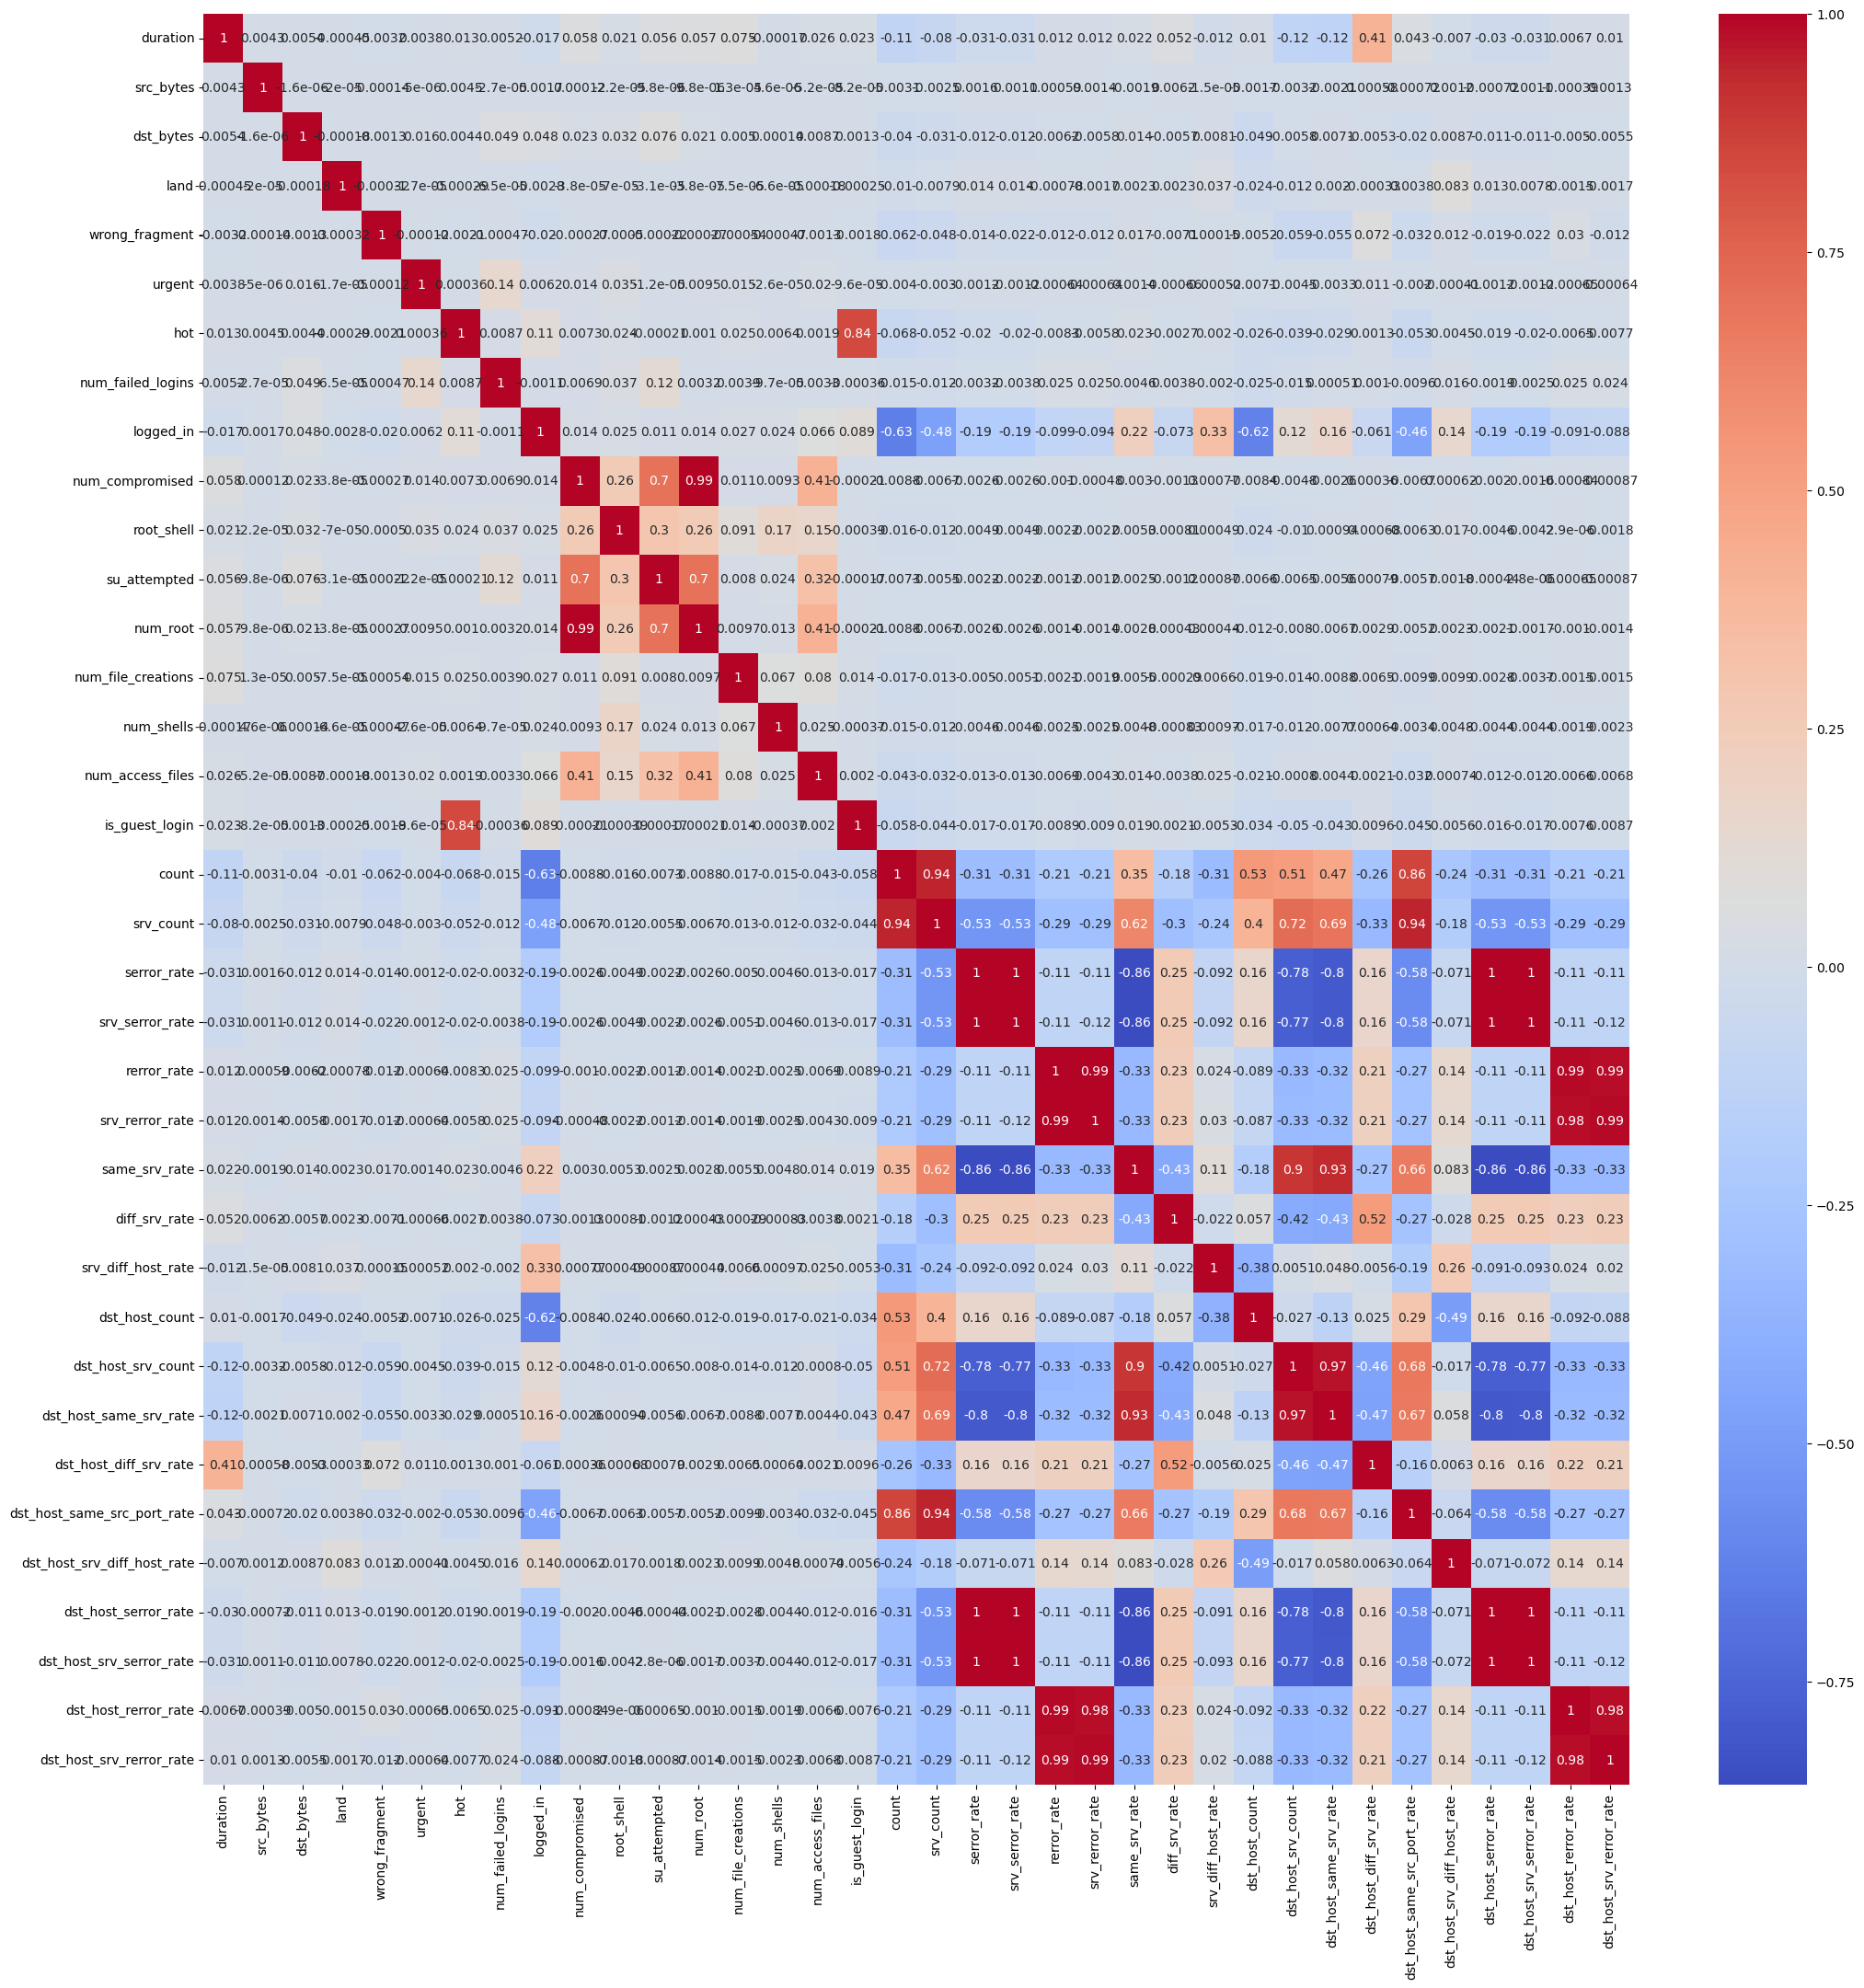

In [9]:
import pandas as pd
import numpy as np

# Drop columns with NaN values
df = df.dropna(axis='columns')

# Drop columns where there are only 1 unique value
df = df[[col for col in df if df[col].nunique() > 1]]

# Identify columns with string data types
string_cols = df.select_dtypes(include=['object']).columns

# Convert string columns to categorical data type or drop them
if len(string_cols) > 0:
    for col in string_cols:
        try:
            df[col] = df[col].astype('category')
        except ValueError:
            print(f"Dropping column '{col}' as it contains non-categorical string values.")
            df = df.drop(col, axis=1)

# Calculate correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 
  
# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 

In [11]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 

In [12]:
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 

In [13]:
df.drop('service', axis = 1, inplace = True) 


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 
  
# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 
  
sc = MinMaxScaler() 
X = sc.fit_transform(X) 
  
# Split test and train data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [16]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
  
clfg = GaussianNB() 
start_time = time.time() 
clfg.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  0.5700585842132568


In [17]:
start_time = time.time() 
y_test_pred = clfg.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time)

Testing time:  0.6508677005767822


In [18]:
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [19]:
 #Decision Tree  
from sklearn.tree import DecisionTreeClassifier 
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) 
start_time = time.time() 
clfd.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  1.1218347549438477


In [20]:
start_time = time.time() 
y_test_pred = clfd.predict(X_train)
end_time = time.time() 
print("Testing time: ", end_time-start_time)

Testing time:  0.06597757339477539


In [21]:
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [22]:
from sklearn.ensemble import RandomForestClassifier 
  
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time() 
clfr.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  9.37671947479248


In [23]:
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time() 
print("Testing time: ", end_time-start_time)

Testing time:  1.075425624847412


In [24]:
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

Train score is: 0.99997583037759
Test score is: 0.9996564986167935


In [25]:
from sklearn.svm import SVC 
  
clfs = SVC(gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  142.02390098571777


In [26]:
start_time = time.time() 
y_test_pred = clfs.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time)

Testing time:  182.7471101284027


In [27]:
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression  
clfl = LogisticRegression(max_iter=1200000) 
start_time = time.time() 
clfl.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time)

Training time:  24.26850175857544


In [29]:
start_time = time.time() 
y_test_pred = clfl.predict(X_train) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  0.0472409725189209


In [30]:
print("Train score is:", clfl.score(X_train, y_train)) 
print("Test score is:", clfl.score(X_test, y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


In [31]:
#Gradient Descent

In [32]:
from sklearn.ensemble import GradientBoostingClassifier 
  
clfg = GradientBoostingClassifier(random_state = 0) 

start_time = time.time() 

clfg.fit(X_train, y_train.values.ravel()) 

end_time = time.time() 

print("Training time: ", end_time-start_time) 

Training time:  411.25883293151855


In [33]:
start_time = time.time() 

y_test_pred = clfg.predict(X_train) 

end_time = time.time() 

print("Testing time: ", end_time-start_time)

Testing time:  2.873692035675049


In [34]:
print("Train score is:", clfg.score(X_train, y_train)) 

print("Test score is:", clfg.score(X_test, y_test)) 

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


<BarContainer object of 6 artists>

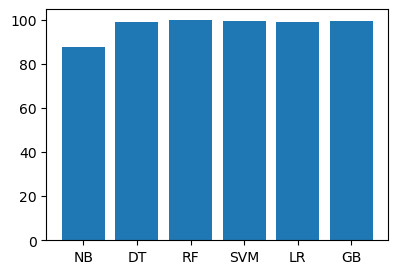

In [35]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)
 #Analyse the training and testing accuracy of each model.

<BarContainer object of 6 artists>

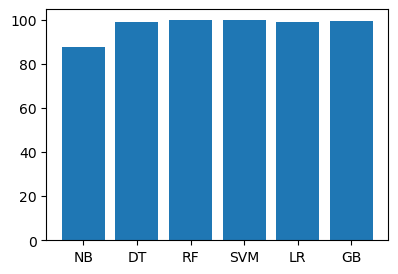

In [36]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB'] 
values = [87.903, 99.052, 99.969, 99.879, 99.352, 99.771] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

<BarContainer object of 6 artists>

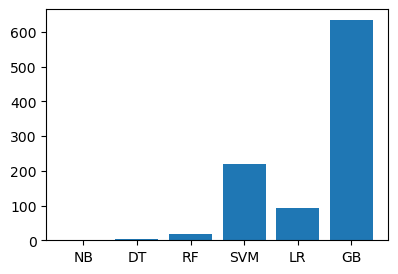

In [37]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.11452, 2.44087, 17.08491, 218.26840, 92.94222, 633.229] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131)
plt.bar(names, values)
#: Analyse the training and testing time of each model.

<BarContainer object of 6 artists>

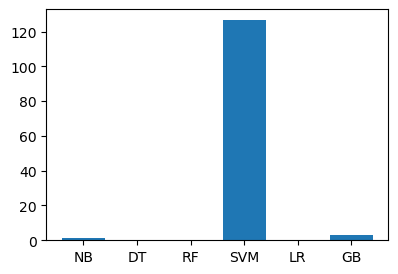

In [38]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039] 
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

In [39]:
import time
from sklearn.ensemble import RandomForestClassifier
import joblib
# Save the trained model
joblib.dump(clfr, 'random_forest_model.pkl')

# To load the model later:
# clfr = joblib.load('random_forest_model.pkl')

print("Random Forest model saved successfully!")

Random Forest model saved successfully!
